In [122]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
import sklearn
from tensorflow import keras
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pickle
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [123]:
language = 'fsl'

In [124]:
datasets = {chr(letter):pd.read_csv(f'processed_data/{language}_mp01021/{chr(letter)}_Data.csv') for letter in range(ord('A'), ord('Z') + 1)}

In [125]:
datasets['A'].head()

,Landmarks,0,0.1,0.2,1,1.1,1.2,2,2.1,2.2,...,17.2,18,18.1,18.2,19,19.1,19.2,20,20.1,20.2
0,Coordinates,x,y,z,x,y,z,x,y,z,...,z,x,y,z,x,y,z,x,y,z
1,Frame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,-0.328798770904541,0.9440675973892212,-0.025055259466171265,0.09019581228494644,0.9056023955345154,-0.2417997121810913,0.46820488572120667,0.5142858624458313,-0.30139783024787903,...,-0.08161065727472305,-0.49492689967155457,-0.06241708993911743,-0.1844290941953659,-0.4510268270969391,0.20504318177700043,-0.10821167379617691,-0.46734902262687683,0.2073359340429306,-0.024087782949209213
3,2,-0.2267197072505951,0.9729245901107788,-0.044898826628923416,0.20533159375190735,0.8290771842002869,-0.22340598702430725,0.5266153812408447,0.4613969922065735,-0.29489830136299133,...,-0.09364113956689835,-0.4352213144302368,-0.06646435707807541,-0.1759088933467865,-0.39210861921310425,0.18160800635814667,-0.09695502370595932,-0.4101670980453491,0.21136802434921265,-0.012231195345520973
4,3,-0.29781967401504517,0.9545851945877075,-0.008398245088756084,0.12096328288316727,0.8573551177978516,-0.1993054896593094,0.4726623594760895,0.46044933795928955,-0.22897109389305115,...,-0.008828305639326572,-0.4492706060409546,-0.06148320436477661,-0.11127342283725739,-0.42576828598976135,0.19160698354244232,-0.04531983286142349,-0.4427775740623474,0.2054169476032257,0.03030148148536682


In [126]:
for key, value in datasets.items():
    datasets[key] = datasets[key].drop([0,1])
    datasets[key] = datasets[key].drop(columns=['Landmarks'])
    datasets[key]['Letter'] = key
    datasets[key] = datasets[key].sample(frac=1).reset_index(drop=True)

In [127]:
datasets['B'].head()

,0,0.1,0.2,1,1.1,1.2,2,2.1,2.2,3,...,18,18.1,18.2,19,19.1,19.2,20,20.1,20.2,Letter
0,0.0795852467417717,0.9960525631904602,-0.03931225463747978,0.3019335865974426,0.731830358505249,-0.09329818189144135,0.32403168082237244,0.37046629190444946,-0.10213545709848404,0.16399915516376495,...,-0.34846094250679016,-0.06915576010942459,-0.16103725135326385,-0.364127516746521,-0.24490518867969513,-0.1714869886636734,-0.36451131105422974,-0.4048369824886322,-0.18844068050384521,B
1,-0.025485457852482796,0.9993658065795898,0.024868156760931015,0.2672223150730133,0.7537699937820435,-0.05722476541996002,0.36359521746635437,0.3824230432510376,-0.058445997536182404,0.21703322231769562,...,-0.3136545717716217,-0.08730047196149826,-0.1742052435874939,-0.30383455753326416,-0.29095426201820374,-0.21852916479110718,-0.30067047476768494,-0.4735124409198761,-0.2510095238685608,B
2,-0.32185637950897217,0.9462157487869263,0.03292699158191681,0.024547381326556206,0.8037567734718323,-0.07079795002937317,0.2502458095550537,0.4762113392353058,-0.11468234658241272,0.16710218787193298,...,-0.3068598806858063,-0.2229243963956833,-0.14472021162509918,-0.27487316727638245,-0.40611064434051514,-0.15859395265579224,-0.25610774755477905,-0.5582436919212341,-0.17638123035430908,B
3,-0.2160702347755432,0.9742141366004944,0.06496532261371613,0.09455863386392593,0.8209435939788818,-0.1341181844472885,0.29630279541015625,0.5095486640930176,-0.20755016803741455,0.19762647151947021,...,-0.30403879284858704,-0.233695849776268,-0.07637669891119003,-0.2783646583557129,-0.41138797998428345,-0.09257268905639648,-0.26346224546432495,-0.5724994540214539,-0.11207856237888336,B
4,-0.30658867955207825,0.9507719874382019,0.04512166231870651,0.04552591219544411,0.8516044020652771,-0.05346770957112312,0.30412811040878296,0.5328806042671204,-0.08445096015930176,0.27761098742485046,...,-0.3314180374145508,-0.2224956899881363,-0.17330141365528107,-0.3030566871166229,-0.4163348376750946,-0.20196020603179932,-0.27764463424682617,-0.5949638485908508,-0.23200008273124695,B


In [128]:
data = pd.concat(datasets.values(), ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,0,0.1,0.2,1,1.1,1.2,2,2.1,2.2,3,...,18,18.1,18.2,19,19.1,19.2,20,20.1,20.2,Letter
0,-0.6590871214866638,0.5669792890548706,0.49410390853881836,-0.5026713013648987,0.14511068165302277,0.47946518659591675,-0.0342513807117939,-0.07136216014623642,0.3596908450126648,0.41888049244880676,...,0.624757707118988,0.6215404868125916,-0.17114168405532837,0.49493157863616943,0.5921531319618225,-0.046511463820934296,0.30760639905929565,0.580741286277771,0.0669931098818779,H
1,-0.24738477170467377,0.9688897728919983,0.007309893146157265,0.15132667124271393,0.8051400780677795,0.13582126796245575,0.47989368438720703,0.59231036901474,0.1272454857826233,0.744012176990509,...,0.23568736016750336,-0.10340812057256699,-0.3502868115901947,0.44930770993232727,-0.19303004443645477,-0.3607160747051239,0.6214891076087952,-0.22171226143836975,-0.3618869185447693,C
2,-0.2289668172597885,0.9723094701766968,0.04678099602460861,-0.06910712271928787,0.8280420303344727,-0.20032024383544922,-0.0015145825454965234,0.53385990858078,-0.2727627158164978,-0.1432657390832901,...,-0.4039650559425354,0.010481004603207111,-0.16116590797901154,-0.38945701718330383,0.18423748016357422,-0.18470986187458038,-0.3586753010749817,0.32203200459480286,-0.16111484169960022,R
3,-0.11452160030603409,0.9901962280273438,0.07997623831033707,0.20382685959339142,0.7221946716308594,0.025931362062692642,0.42310240864753723,0.45806464552879333,-0.045927297323942184,0.6102858185768127,...,0.04343895614147186,0.031244764104485512,-0.2987414002418518,0.2668924331665039,0.07991699874401093,-0.29932889342308044,0.3997458517551422,0.1957661658525467,-0.27326154708862305,D
4,-0.5536542534828186,-0.6722058057785034,0.49153465032577515,-0.23597757518291473,-0.4228227436542511,0.4465717077255249,-0.03498419001698494,0.04088331386446953,0.32846614718437195,-0.022108808159828186,...,-0.8019885420799255,0.3738771378993988,-0.20501285791397095,-0.8544965386390686,0.23691396415233612,-0.10724152624607086,-0.8294486999511719,0.07946040481328964,-0.02734488993883133,P


In [129]:
y = data['Letter']
X = data.drop(columns=['Letter'])

In [130]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.3, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.dropna()
X_train = X_train.to_numpy()
X_val = X_val.apply(pd.to_numeric, errors='coerce')
X_val = X_val.dropna()
X_val = X_val.to_numpy()
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.dropna()
X_test = X_test.to_numpy()


le = LabelEncoder()
y_train = le.fit_transform(y_train)  
y_val = le.transform(y_val)  
y_test = le.transform(y_test)

In [131]:
X_train.shape

(6502, 63)

In [132]:
def squared_relu(x):
    return tf.nn.relu(x) ** 2

def cubed_relu(x):
    return tf.nn.relu(x) ** 3

def root_relu(x):
    return tf.sqrt(tf.nn.relu(x) + 1e-6)

def create_keras_model(activation_fcn = None):
    if activation_fcn is None:
        model = keras.Sequential([
            keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.3),  

            keras.layers.Dense(64, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.3),

            keras.layers.Dense(32, activation='relu'),

            keras.layers.Dense(26, activation='softmax')  # 26 classes
        ])
    else:
        model = keras.Sequential([
            keras.layers.Dense(128),
            keras.layers.Lambda(activation_fcn),  # Squared ReLU
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.3),

            keras.layers.Dense(64),
            keras.layers.Lambda(activation_fcn),  # Cubed ReLU
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.3),

            keras.layers.Dense(32),
            keras.layers.Lambda(activation_fcn),  # Root ReLU

            keras.layers.Dense(26, activation='softmax')  # 26 classes
        ])

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',  
                metrics=['accuracy'])
    return model

labels = [chr(i) for i in range(65, 91)]

### Training The Model Using ReLU

In [133]:
keras_model = create_keras_model()
keras_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_data=(X_val, y_val))

d:\Fingerspelling-Recognition\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
val_loss, val_acc = keras_model.evaluate(X_val, y_val, verbose=0)
print(f"Final Validation Accuracy: {val_acc:.4f}")
test_loss, test_acc = keras_model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc:.4f}")

Final Validation Accuracy: 0.9770
Final Test Accuracy: 0.9849


In [135]:
y_pred_probs = keras_model.predict(X_test) 
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_pred)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


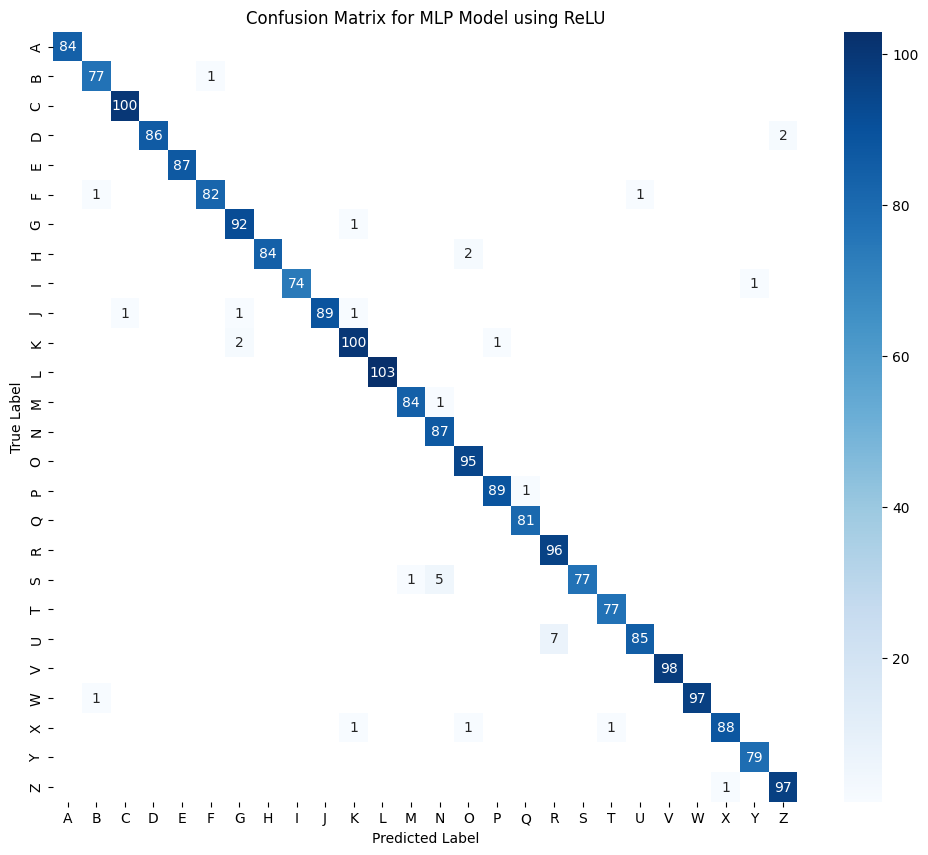

In [136]:
cm_display = cm.astype(float)
cm_display[cm_display == 0] = np.nan 

plt.figure(figsize=(12, 10))
sns.heatmap(cm_display, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MLP Model using ReLU")
plt.show()

In [137]:
keras_model.save(f"models/{language}/keras_ANN.keras")

### Training The Model Using ReLU Squared

In [138]:
keras_model_relu_squared = create_keras_model(squared_relu)
keras_model_relu_squared.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_data=(X_val, y_val))
val_loss, val_acc = keras_model_relu_squared.evaluate(X_val, y_val, verbose=0)
print(f"Final Validation Accuracy: {val_acc:.4f}")
test_loss, test_acc = keras_model_relu_squared.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc:.4f}")

Final Validation Accuracy: 0.9785
Final Test Accuracy: 0.9802


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


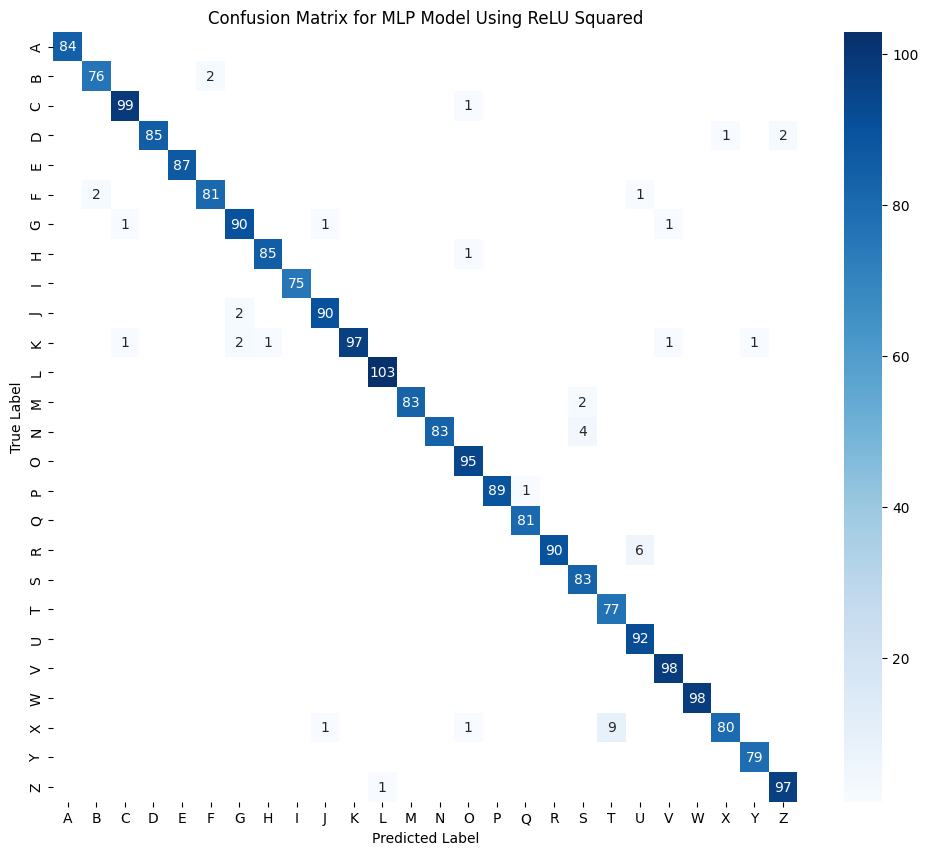

In [139]:
y_pred_probs = keras_model_relu_squared.predict(X_test) 
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_pred)

cm_display = cm.astype(float)
cm_display[cm_display == 0] = np.nan 

plt.figure(figsize=(12, 10))
sns.heatmap(cm_display, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MLP Model Using ReLU Squared")
plt.show()

### Training The Model Using ReLU Cubed

In [140]:
keras_model_relu_cubed = create_keras_model(cubed_relu)
keras_model_relu_cubed.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_data=(X_val, y_val))
val_loss, val_acc = keras_model_relu_cubed.evaluate(X_val, y_val, verbose=0)
print(f"Final Validation Accuracy: {val_acc:.4f}")
test_loss, test_acc = keras_model_relu_cubed.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc:.4f}")

Final Validation Accuracy: 0.9656
Final Test Accuracy: 0.9621


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


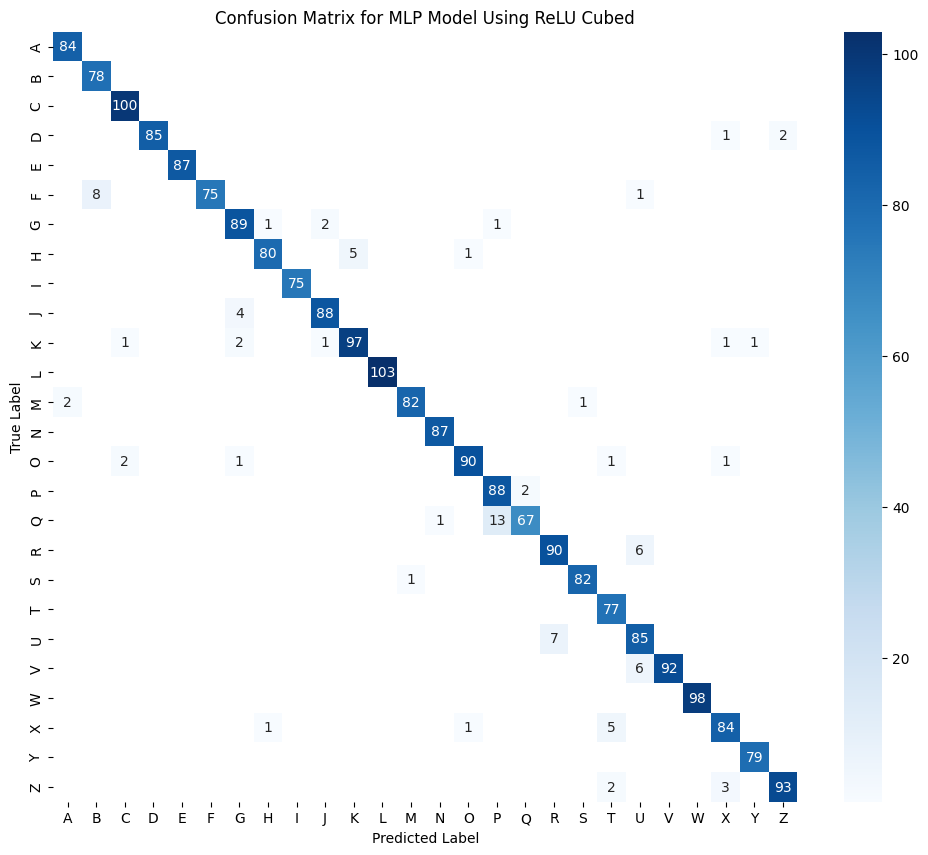

In [141]:
y_pred_probs = keras_model_relu_cubed.predict(X_test) 
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_pred)

cm_display = cm.astype(float)
cm_display[cm_display == 0] = np.nan 

plt.figure(figsize=(12, 10))
sns.heatmap(cm_display, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MLP Model Using ReLU Cubed")
plt.show()

### Training The Model Using Root ReLU

In [142]:
keras_model_root_relu = create_keras_model(root_relu)
keras_model_root_relu.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_data=(X_val, y_val))
val_loss, val_acc = keras_model_root_relu.evaluate(X_val, y_val, verbose=0)
print(f"Final Validation Accuracy: {val_acc:.4f}")
test_loss, test_acc = keras_model_root_relu.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc:.4f}")

Final Validation Accuracy: 0.9727
Final Test Accuracy: 0.9755


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


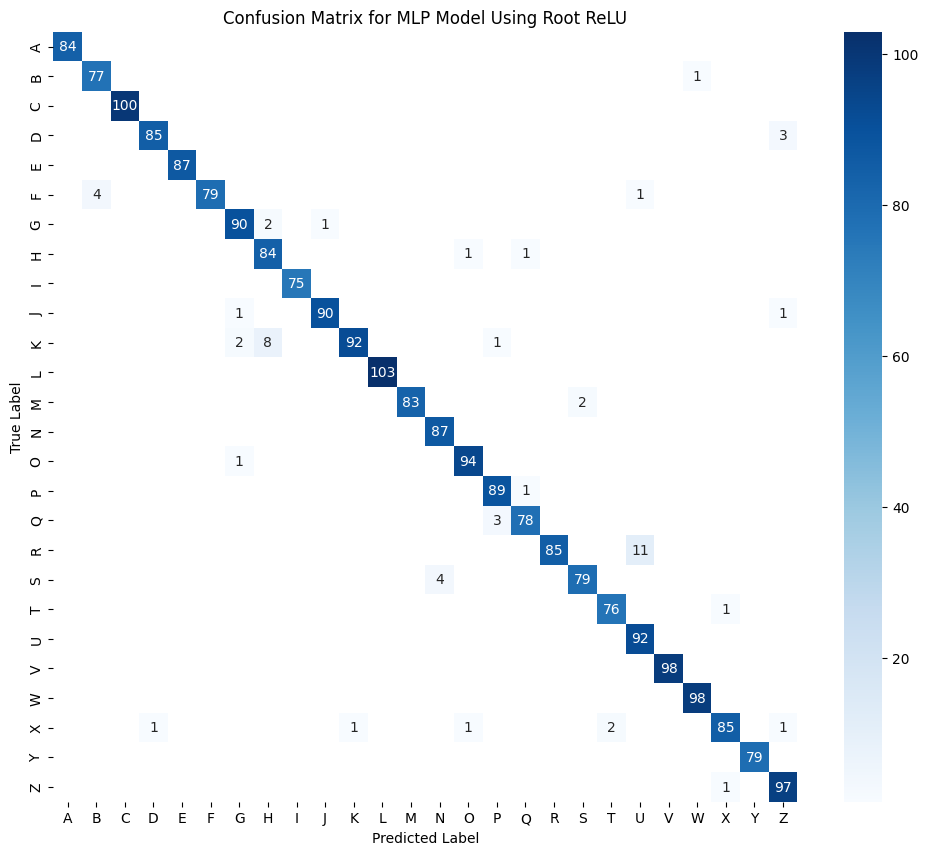

In [143]:
y_pred_probs = keras_model_root_relu.predict(X_test) 
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_pred)

cm_display = cm.astype(float)
cm_display[cm_display == 0] = np.nan 

plt.figure(figsize=(12, 10))
sns.heatmap(cm_display, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MLP Model Using Root ReLU")
plt.show()

### Trying XGBoost Model

In [ ]:
def create_xgb_model():
    model = xgb.XGBClassifier(
        objective="multi:softmax",
        num_class=26,
        eval_metric="mlogloss",
        max_depth=6,
        learning_rate=0.05,
        n_estimators=300,
        use_label_encoder=False
    )
    return model

In [145]:
xgb_model = create_xgb_model()
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

[0]	validation_0-mlogloss:2.77060


d:\Fingerspelling-Recognition\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:28:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation_0-mlogloss:2.46607
[2]	validation_0-mlogloss:2.24037
[3]	validation_0-mlogloss:2.05923
[4]	validation_0-mlogloss:1.90915
[5]	validation_0-mlogloss:1.78030
[6]	validation_0-mlogloss:1.66770
[7]	validation_0-mlogloss:1.56761
[8]	validation_0-mlogloss:1.47770
[9]	validation_0-mlogloss:1.39700
[10]	validation_0-mlogloss:1.32352
[11]	validation_0-mlogloss:1.25573
[12]	validation_0-mlogloss:1.19323
[13]	validation_0-mlogloss:1.13535
[14]	validation_0-mlogloss:1.08168
[15]	validation_0-mlogloss:1.03183
[16]	validation_0-mlogloss:0.98491
[17]	validation_0-mlogloss:0.94131
[18]	validation_0-mlogloss:0.90011
[19]	validation_0-mlogloss:0.86131
[20]	validation_0-mlogloss:0.82471
[21]	validation_0-mlogloss:0.79032
[22]	validation_0-mlogloss:0.75818
[23]	validation_0-mlogloss:0.72736
[24]	validation_0-mlogloss:0.69831
[25]	validation_0-mlogloss:0.67073
[26]	validation_0-mlogloss:0.64455
[27]	validation_0-mlogloss:0.61982
[28]	validation_0-mlogloss:0.59632
[29]	validation_0-mlogloss:0.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_class=26, num_parallel_tree=None, ...)

In [146]:
y_pred_val = xgb_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_val)
print(f"Evaluation Accuracy: {accuracy:.4f}")

Evaluation Accuracy: 0.9849


In [147]:
y_pred_test = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9836


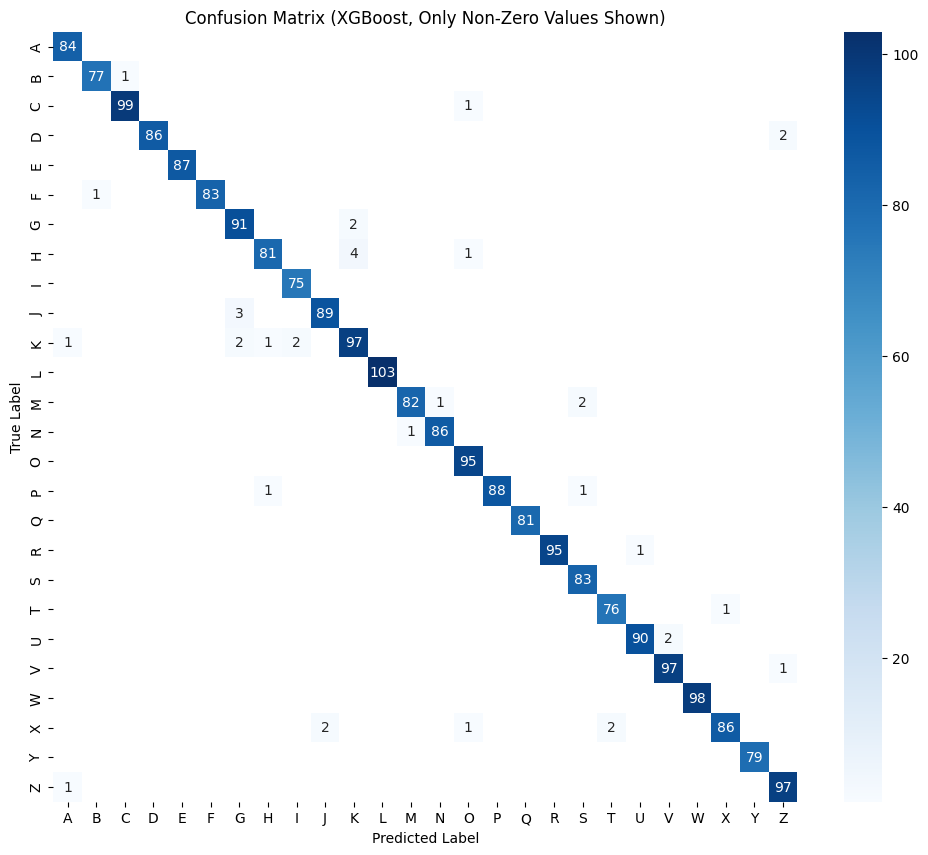

In [148]:
cm = confusion_matrix(y_test, y_pred_test)

cm_display = cm.astype(float)
cm_display[cm_display == 0] = np.nan

plt.figure(figsize=(12, 10))
sns.heatmap(cm_display, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (XGBoost, Only Non-Zero Values Shown)")
plt.show()

In [149]:
xgb_model.save_model(f"models/{language}/xgboost_model.json")